In [1]:
#Instalação de Bibliotecas
!pip install split-folders

In [2]:
# TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.preprocessing import image

# Matplotlib
import matplotlib.pyplot as plt

#Other Library
import numpy as np
import zipfile
import cv2
import os
import random
import shutil
import splitfolders
import seaborn as sns
from PIL import Image
from PIL import Image, ImageEnhance
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go



##Sincronizando com o Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Defina o caminho para a pasta do dataset no Google Drive
local_zip = '/content/drive/MyDrive/ENTREGA TCC - EXERCÍCIOS EM ACADEMIA/WORKOUT.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data/')
zip_ref.close()

In [5]:
# Local da Pasta
folder_path = '/content/data'

In [6]:
# Copiar Diretório data para data_copy
copy_path = '/content/data_copy'

shutil.copytree(folder_path, copy_path)

'/content/data_copy'

In [7]:
#Verificar as Categorias dentro das Pastas e a Quantidade de Imagens
categoria = ['barbell biceps curl', 'bench press', 'chest fly machine', 'deadlift', 'decline bench press',
            'hammer curl', 'hip thrust', 'incline bench press', 'lat pulldown', 'lateral raises',
            'leg extension', 'leg raises', 'plank', 'pull up', 'push up', 'romanian deadlift', 'russian twist',
            'shoulder press', 'squat', 't bar row', 'tricep dips', 'tricep pushdown']

folder_path = '/content/data'

value = []
for folder in categoria:
    folder_dir = os.path.join(folder_path, folder)
    if os.path.exists(folder_dir):
        num_files = len(os.listdir(folder_dir))
        value.append(num_files)
        print("The number of " + folder + " images: " + str(num_files) + ".")
    else:
        print("The folder " + folder + " does not exist.")

The number of barbell biceps curl images: 705.
The number of bench press images: 625.
The number of chest fly machine images: 527.
The number of deadlift images: 530.
The number of decline bench press images: 514.
The number of hammer curl images: 546.
The number of hip thrust images: 557.
The number of incline bench press images: 729.
The number of lat pulldown images: 646.
The number of lateral raises images: 843.
The number of leg extension images: 586.
The number of leg raises images: 514.
The number of plank images: 993.
The number of pull up images: 615.
The number of push up images: 601.
The number of romanian deadlift images: 555.
The number of russian twist images: 522.
The number of shoulder press images: 512.
The number of squat images: 742.
The number of t bar row images: 668.
The number of tricep dips images: 698.
The number of tricep pushdown images: 625.


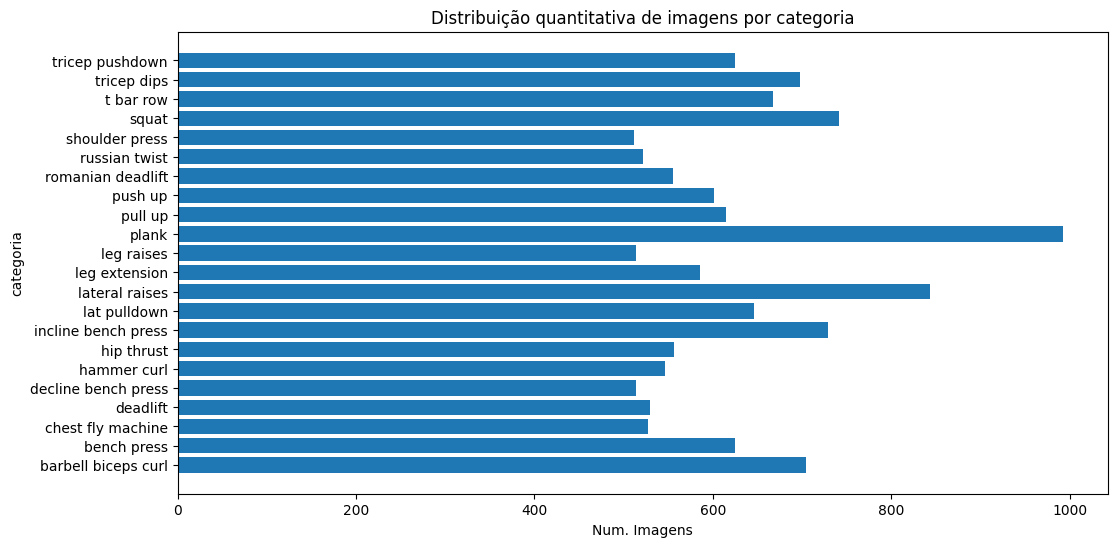

In [8]:
plt.figure(figsize=(12, 6))
plt.barh(categoria, value)
plt.xlabel('Num. Imagens')  # Eixo x
plt.ylabel('categoria')  # Eixo y
plt.title('Distribuição quantitativa de imagens por categoria')
plt.show()

In [9]:
data_dir = '/content/data_copy'  # Diretorio Base
train_dir = '/content/data_copy/train'  # Diretorio de Treino
test_dir = '/content/data_copy/test'  # Diretório de Teste

# Criar Diretorios de Treino e Test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [10]:
# Percorra cada categoria
for folder in categoria:
    # Recuperar a lista de arquivos na pasta categoria
    files = os.listdir(os.path.join(data_dir, folder))
    random.shuffle(files)

    # Calculando a quantidade de dados para treinamento e teste
    train_count = int(len(files) * 0.8)
    test_count = len(files) - train_count

    # Arquivos movidos para o diretório de treino
    for file in files[:train_count]:
        src_path = os.path.join(data_dir, folder, file)
        dst_path = os.path.join(train_dir, folder, file)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    # Arquivos movidos para o diretório de teste
    for file in files[train_count:]:
        src_path = os.path.join(data_dir, folder, file)
        dst_path = os.path.join(test_dir, folder, file)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

print("Os dados foram divididos com sucesso em dados de treinamento e dados de teste.")

Os dados foram divididos com sucesso em dados de treinamento e dados de teste.


In [11]:
#Verificar as Categorias dentro das Pastas e a Quantidade de Imagens
#Conjunto de Treino
folder_path_test = '/content/data_copy/test'

value_test = []
for folder in categoria:
    folder_dir = os.path.join(folder_path_test, folder)
    if os.path.exists(folder_dir):
        num_files = len(os.listdir(folder_dir))
        value_test.append(num_files)
        print("O número de " + folder + " imagens: " + str(num_files) + ".")
    else:
        print("A pasta " + folder + " não existe.")

O número de barbell biceps curl imagens: 141.
O número de bench press imagens: 125.
O número de chest fly machine imagens: 106.
O número de deadlift imagens: 106.
O número de decline bench press imagens: 103.
O número de hammer curl imagens: 110.
O número de hip thrust imagens: 112.
O número de incline bench press imagens: 146.
O número de lat pulldown imagens: 130.
O número de lateral raises imagens: 169.
O número de leg extension imagens: 118.
O número de leg raises imagens: 103.
O número de plank imagens: 199.
O número de pull up imagens: 123.
O número de push up imagens: 121.
O número de romanian deadlift imagens: 111.
O número de russian twist imagens: 105.
O número de shoulder press imagens: 103.
O número de squat imagens: 149.
O número de t bar row imagens: 134.
O número de tricep dips imagens: 140.
O número de tricep pushdown imagens: 125.


In [12]:
#Verificar as Categorias dentro das Pastas e a Quantidade de Imagens
#Conjunto de Teste
folder_path_train = '/content/data_copy/train'

value_train = []
for folder in categoria:
    folder_dir = os.path.join(folder_path_train, folder)
    if os.path.exists(folder_dir):
        num_files = len(os.listdir(folder_dir))
        value_train.append(num_files)
        print("O número de " + folder + " imagens: " + str(num_files) + ".")
    else:
        print("A pasta " + folder + " não existe.")

O número de barbell biceps curl imagens: 564.
O número de bench press imagens: 500.
O número de chest fly machine imagens: 421.
O número de deadlift imagens: 424.
O número de decline bench press imagens: 411.
O número de hammer curl imagens: 436.
O número de hip thrust imagens: 445.
O número de incline bench press imagens: 583.
O número de lat pulldown imagens: 516.
O número de lateral raises imagens: 674.
O número de leg extension imagens: 468.
O número de leg raises imagens: 411.
O número de plank imagens: 794.
O número de pull up imagens: 492.
O número de push up imagens: 480.
O número de romanian deadlift imagens: 444.
O número de russian twist imagens: 417.
O número de shoulder press imagens: 409.
O número de squat imagens: 593.
O número de t bar row imagens: 534.
O número de tricep dips imagens: 558.
O número de tricep pushdown imagens: 500.


#ANÁLISE EXPLORATÓRIA DE DADOS

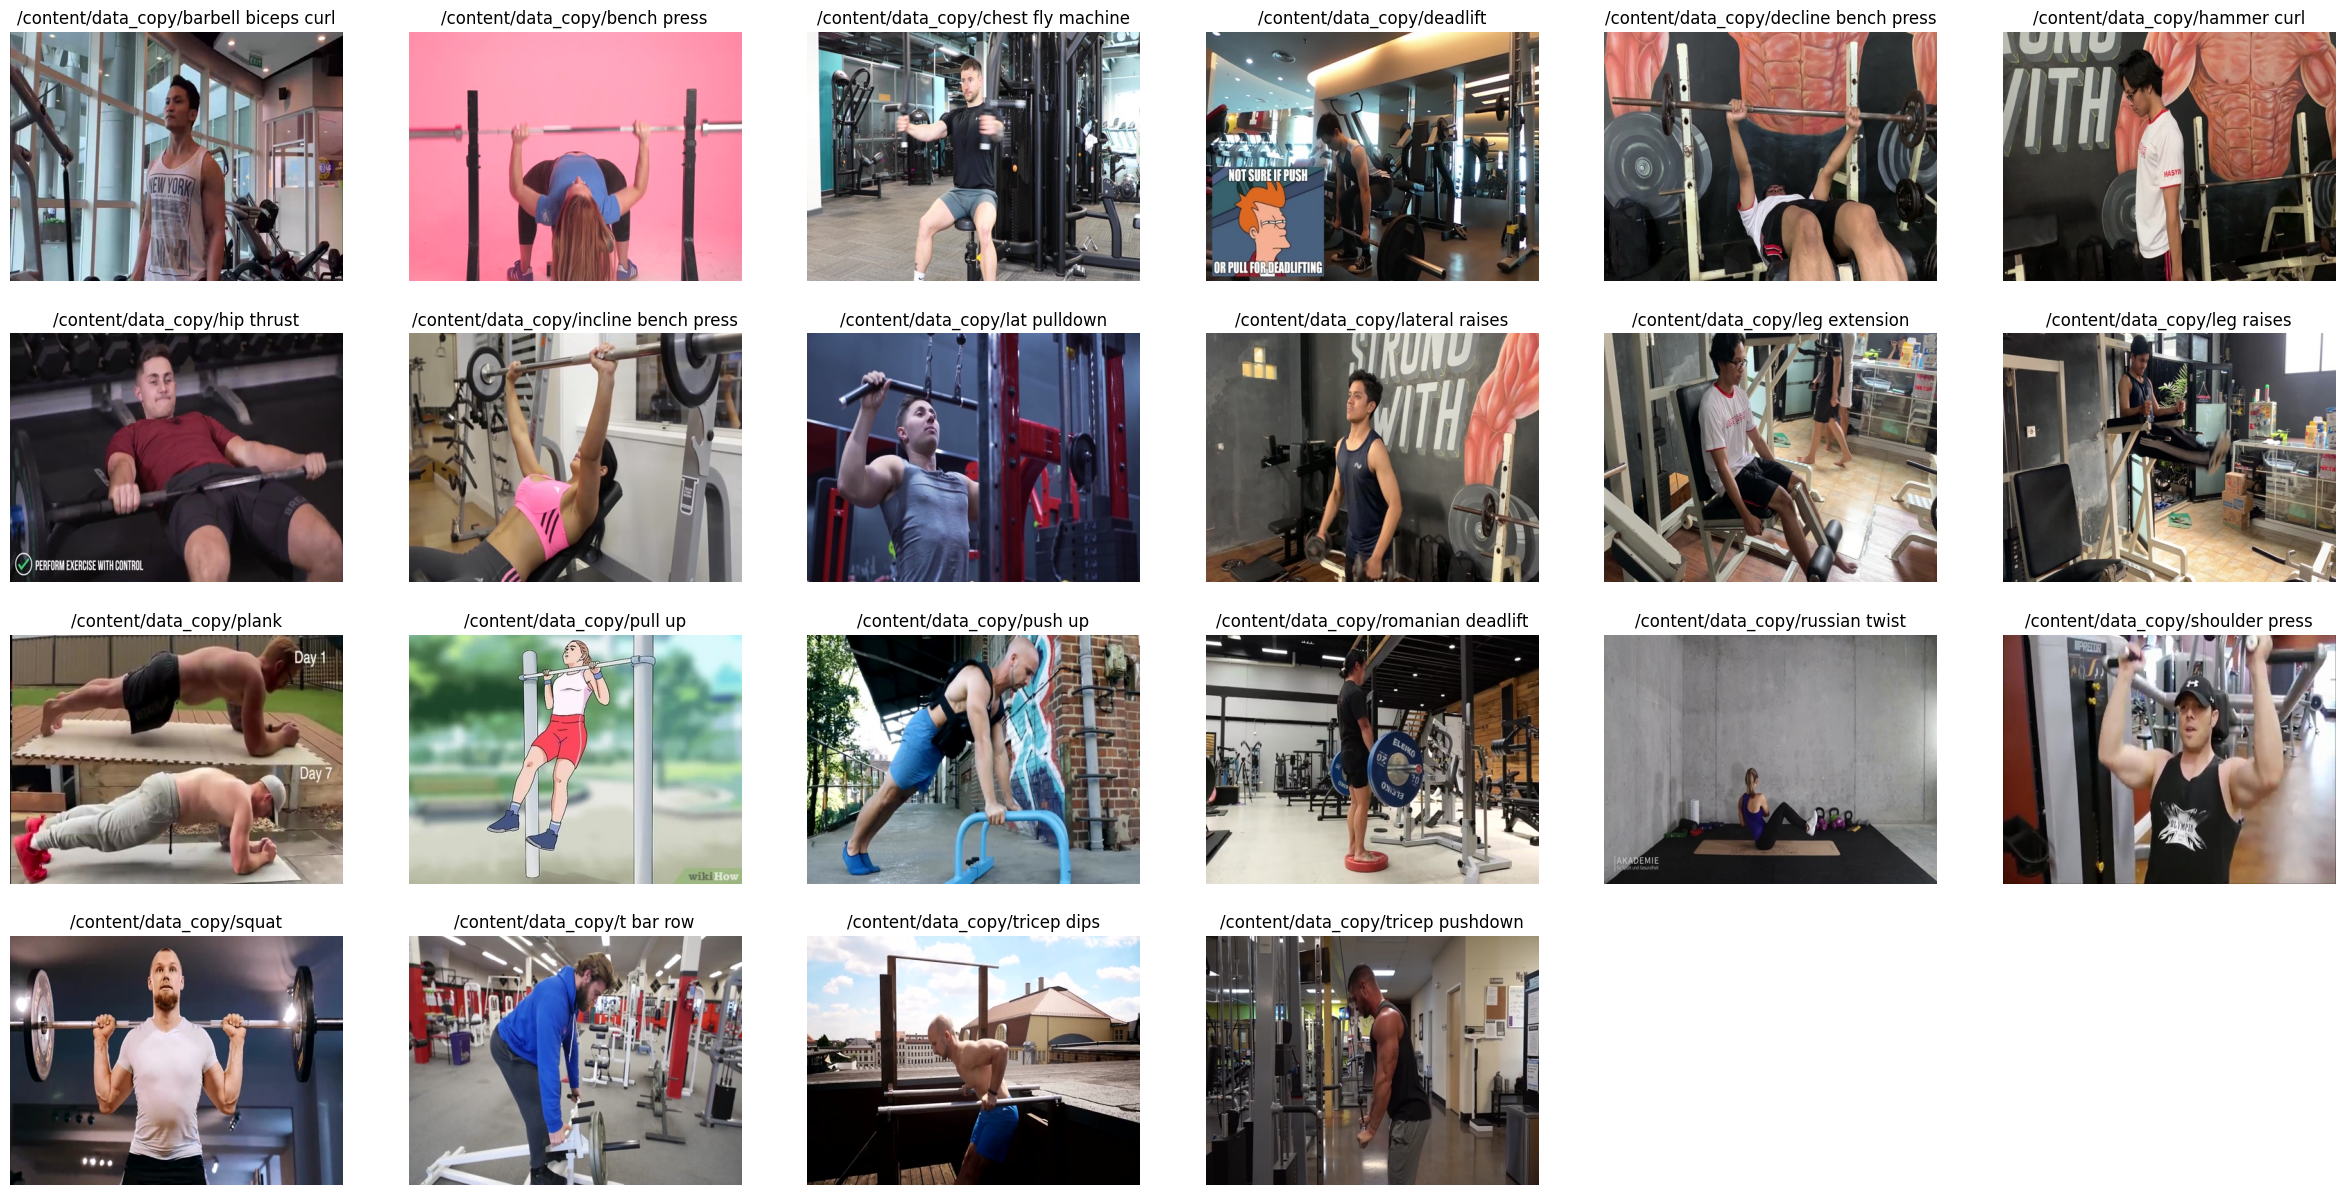

In [13]:
# Lista de diretórios
diretorios = [
    '/content/data_copy/barbell biceps curl',
    '/content/data_copy/bench press',
    '/content/data_copy/chest fly machine',
    '/content/data_copy/deadlift',
    '/content/data_copy/decline bench press',
    '/content/data_copy/hammer curl',
    '/content/data_copy/hip thrust',
    '/content/data_copy/incline bench press',
    '/content/data_copy/lat pulldown',
    '/content/data_copy/lateral raises',
    '/content/data_copy/leg extension',
    '/content/data_copy/leg raises',
    '/content/data_copy/plank',
    '/content/data_copy/pull up',
    '/content/data_copy/push up',
    '/content/data_copy/romanian deadlift',
    '/content/data_copy/russian twist',
    '/content/data_copy/shoulder press',
    '/content/data_copy/squat',
    '/content/data_copy/t bar row',
    '/content/data_copy/tricep dips',
    '/content/data_copy/tricep pushdown'
]

# Configurar a exibição das imagens em uma única linha
plt.figure(figsize=(30, 15))

# Exibir a primeira imagem de cada diretório lado a lado
for i, diretorio in enumerate(diretorios):
    imagens = os.listdir(diretorio)
    if imagens:
        imagem_path = os.path.join(diretorio, imagens[1])
        imagem = Image.open(imagem_path)
        plt.subplot(4, 6, i + 1)
        plt.imshow(imagem)
        plt.title(diretorio)
        plt.axis('off')

plt.show()

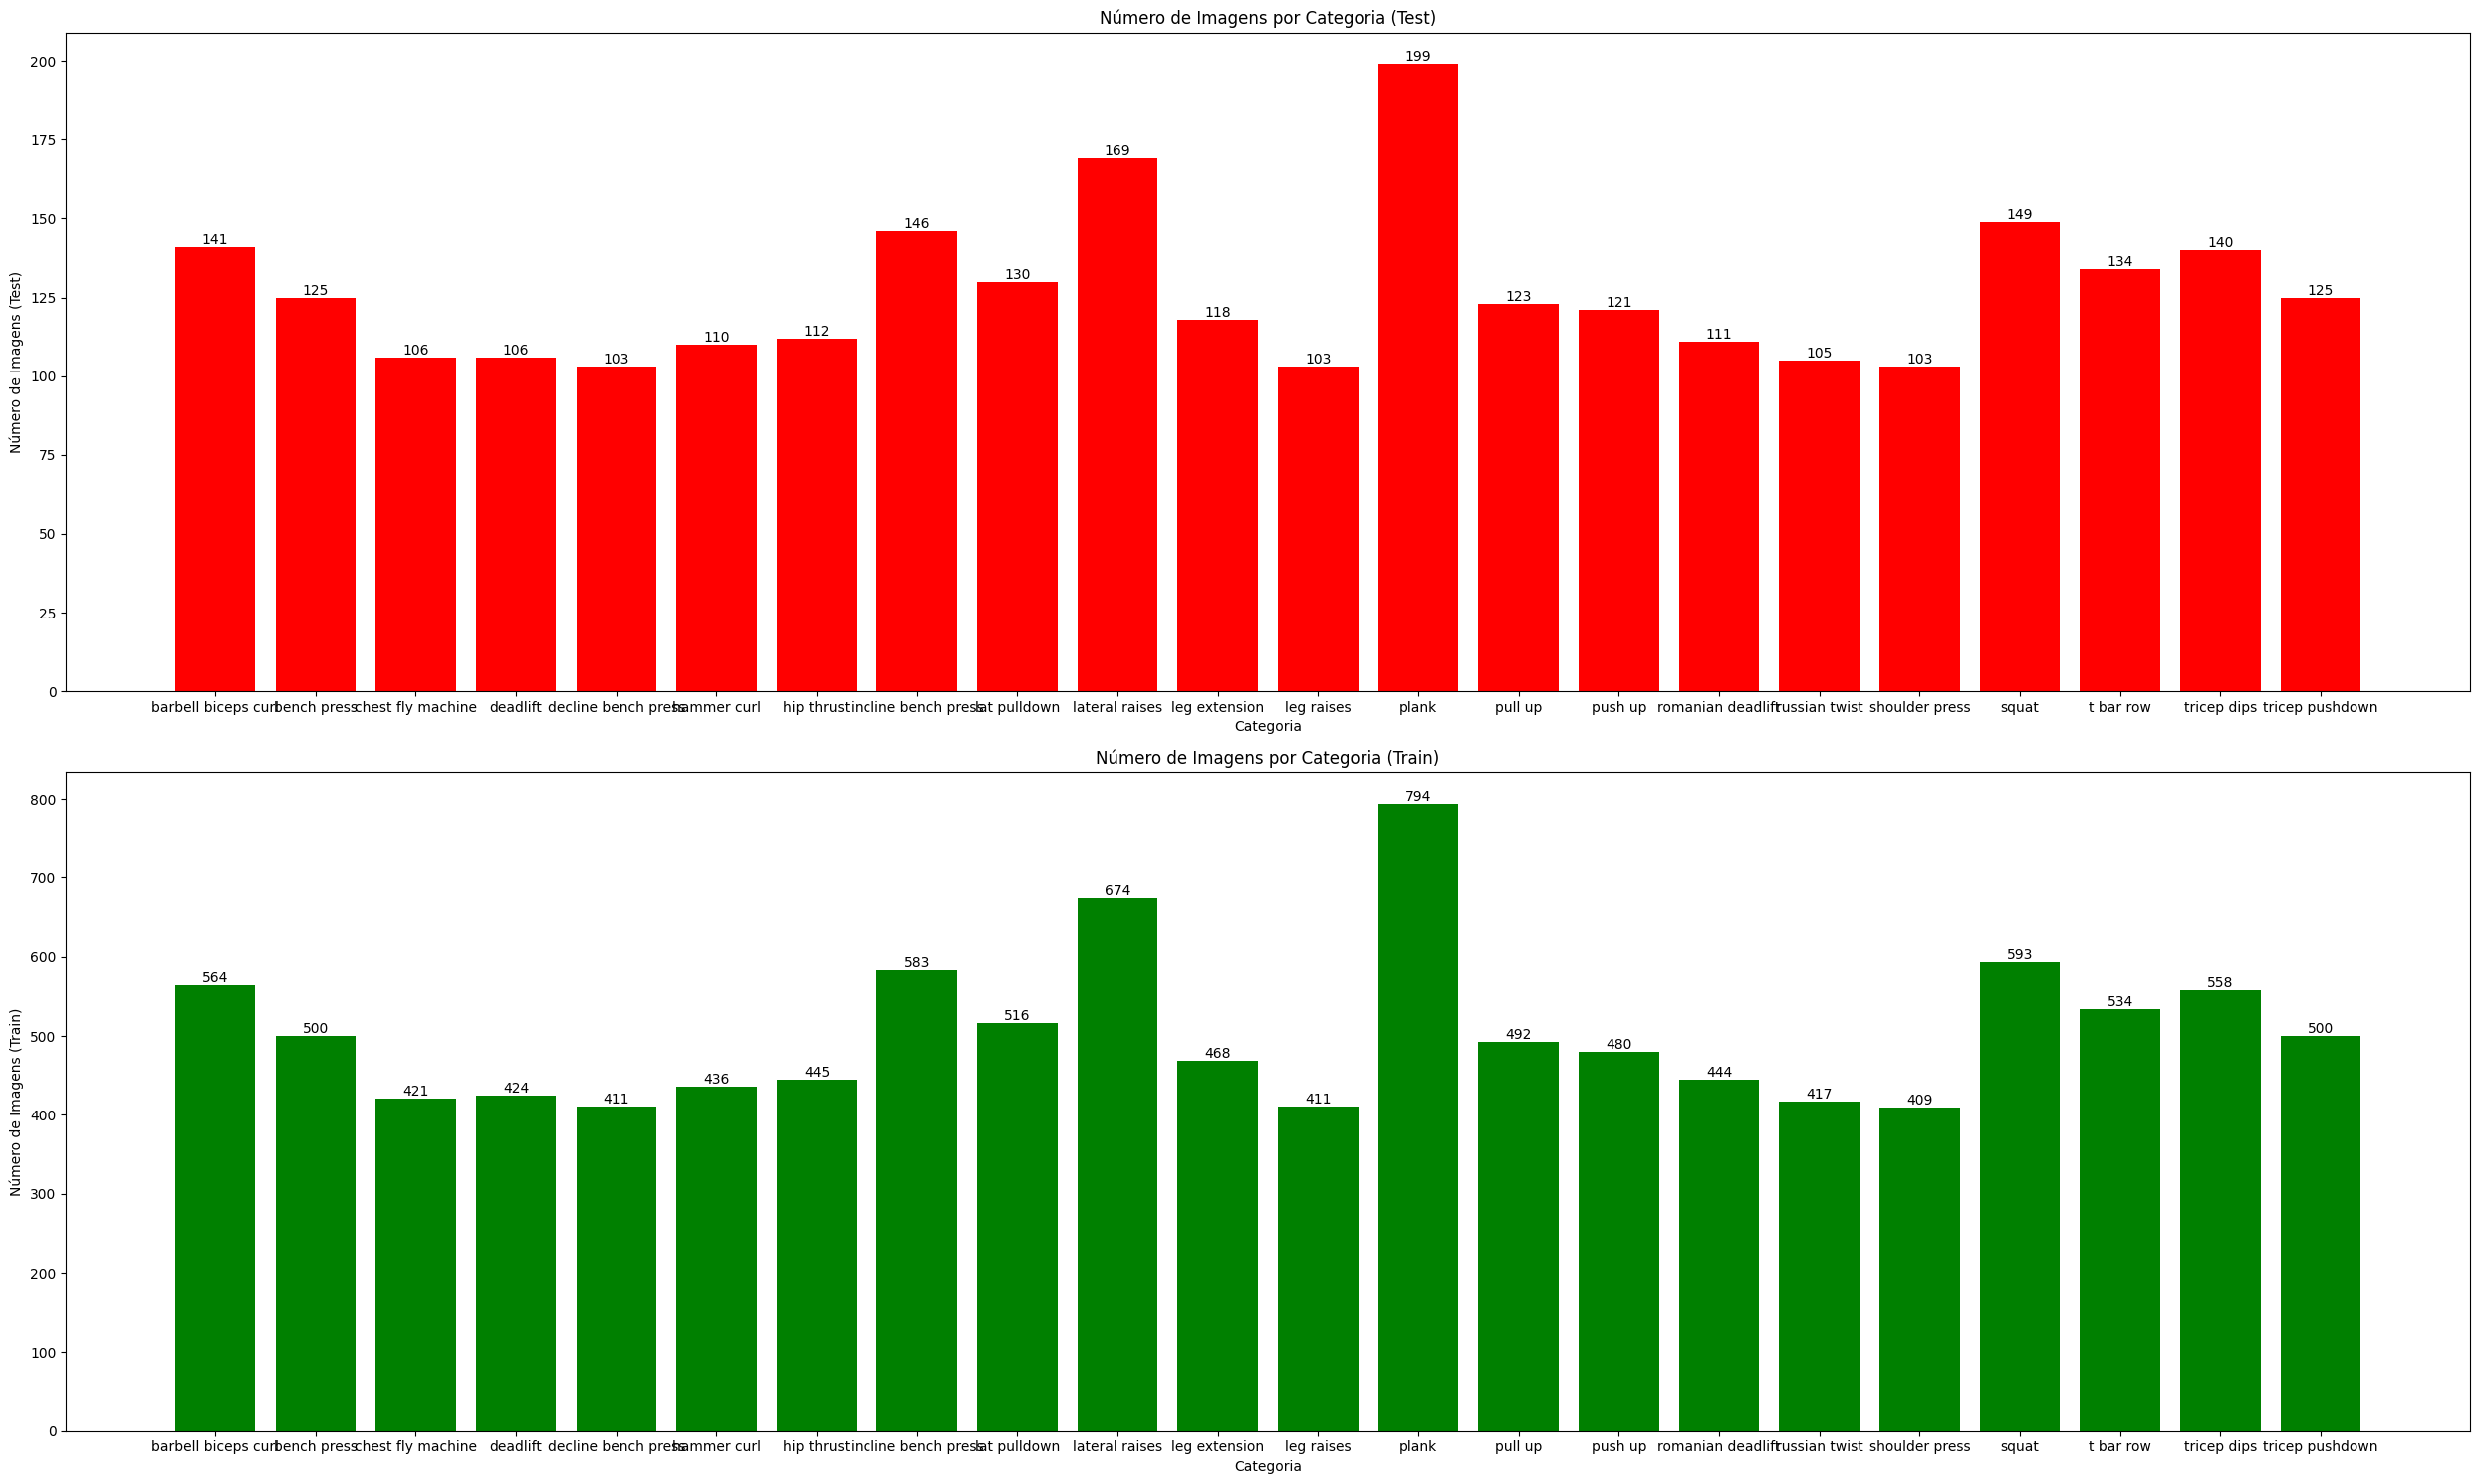

In [14]:
plt.figure(figsize=(25, 15))

# Plotar o gráfico para os diretórios de teste
plt.subplot(2, 1, 1)
plt.bar(categoria, value_test, color='red')
plt.xlabel('Categoria')
plt.ylabel('Número de Imagens (Test)')
plt.title('Número de Imagens por Categoria (Test)')

for i, test in enumerate(value_test):
    plt.text(i, test, str(test), ha='center', va='bottom')

# Plotar o gráfico para os diretórios de treino
plt.subplot(2, 1, 2)
plt.bar(categoria, value_train, color='green')
plt.xlabel('Categoria')
plt.ylabel('Número de Imagens (Train)')
plt.title('Número de Imagens por Categoria (Train)')

for i, train in enumerate(value_train):
    plt.text(i, train, str(train), ha='center', va='bottom')

plt.tight_layout()
plt.show()

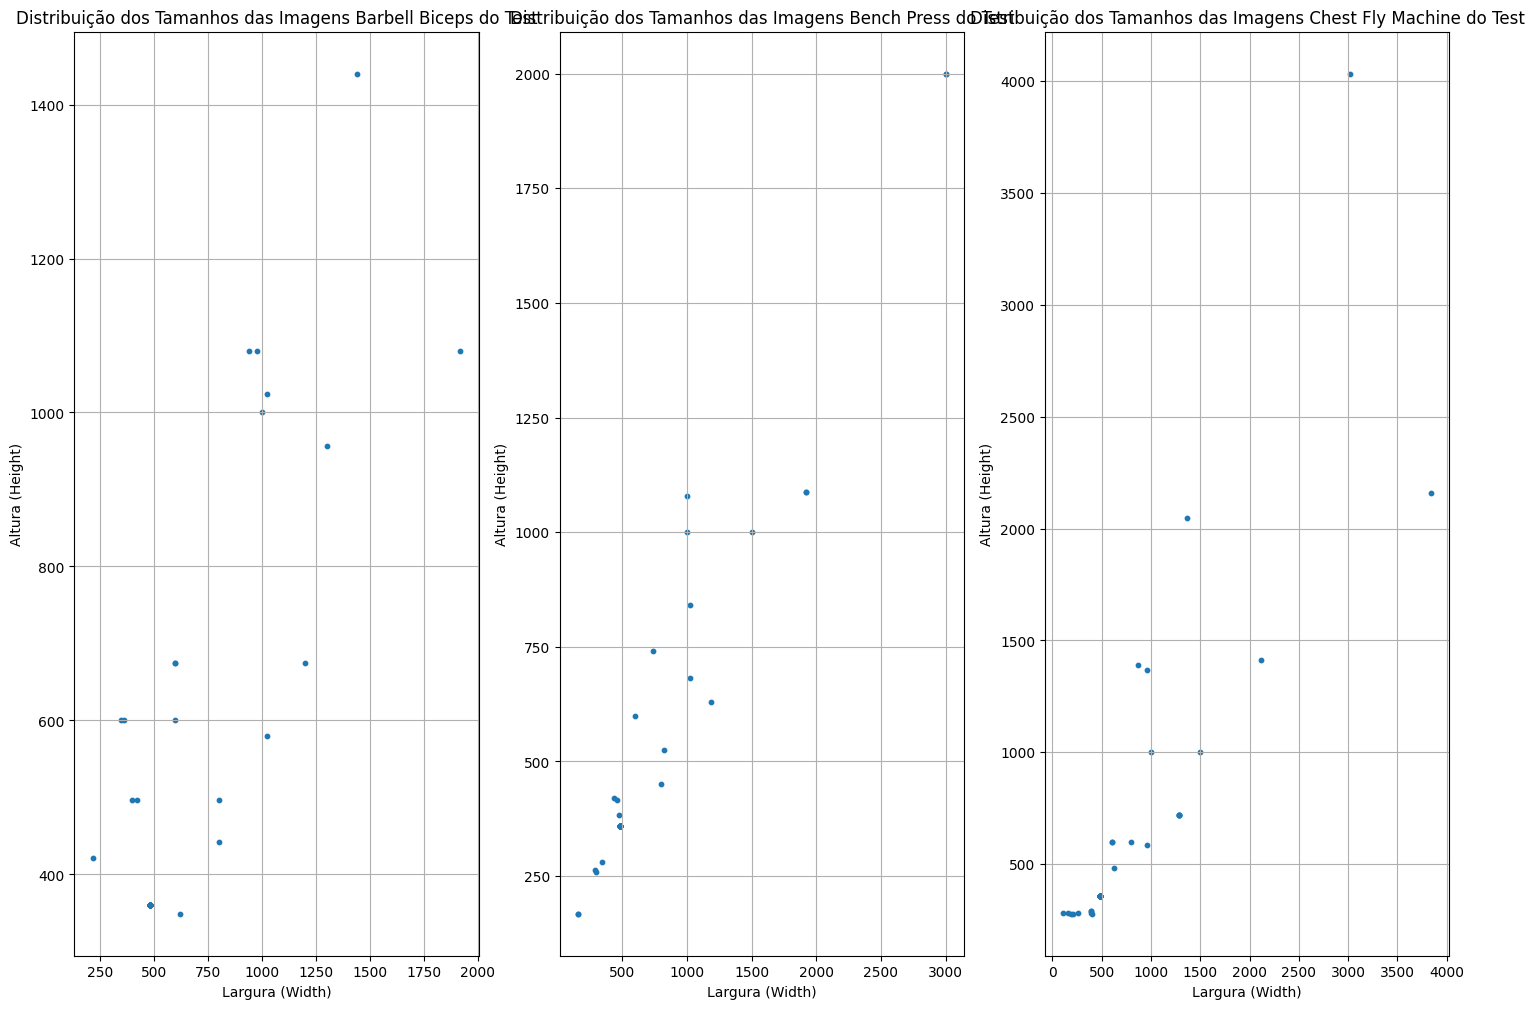

In [15]:
# Diretório de imagens
img_test_barbell_biceps_dir = '/content/data_copy/barbell biceps curl'
img_test_bench_press_dir = '/content/data_copy/bench press'
img_test_chest_fly_machine_dir = '/content/data_copy/chest fly machine'

# Lista para armazenar os tamanhos das imagens
image_sizes_test_barbell_biceps = []
image_sizes_test_bench_press = []
image_sizes_test_chest_fly_machine = []


#--------CONJUNTO DE TEST-----------#

# Função para calcular o tamanho das imagens de pneumonia do conjunto de test
def calculate_image_sizes_test_barbell_biceps(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.mp4') or filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)
            height_test_barbell_biceps, width_test_barbell_biceps, _ = image.shape
            image_sizes_test_barbell_biceps.append((height_test_barbell_biceps, width_test_barbell_biceps))

# Calcular os tamanhos das imagens
calculate_image_sizes_test_barbell_biceps(img_test_barbell_biceps_dir)

# Separar a altura (height) e largura (width) em listas separadas
heights_test_barbell_biceps, widths_test_barbell_biceps = zip(*image_sizes_test_barbell_biceps)

# Criar um gráfico de dispersão para mostrar a distribuição dos tamanhos
plt.figure(figsize=(24, 12))
plt.subplot(1, 4, 1)
plt.scatter(widths_test_barbell_biceps, heights_test_barbell_biceps, marker='o', s=10)
plt.xlabel('Largura (Width)')
plt.ylabel('Altura (Height)')
plt.title('Distribuição dos Tamanhos das Imagens Barbell Biceps do Test')
plt.grid(True)


#--------CONJUNTO DE TEST-----------#

# Função para calcular o tamanho das imagens de pneumonia do conjunto de test
def calculate_image_sizes_test_bench_press(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.jpeg') or filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)
            height_test_bench_press, width_test_bench_press, _ = image.shape
            image_sizes_test_bench_press.append((height_test_bench_press, width_test_bench_press))

# Calcular os tamanhos das imagens
calculate_image_sizes_test_bench_press(img_test_bench_press_dir)

# Separar a altura (height) e largura (width) em listas separadas
heights_test_bench_press, widths_test_bench_press = zip(*image_sizes_test_bench_press)

# Criar um gráfico de dispersão para mostrar a distribuição dos tamanhos
plt.subplot(1, 4, 2)
plt.scatter(widths_test_bench_press, heights_test_bench_press, marker='o', s=10)
plt.xlabel('Largura (Width)')
plt.ylabel('Altura (Height)')
plt.title('Distribuição dos Tamanhos das Imagens Bench Press do Test')
plt.grid(True)

#--------CONJUNTO DE TEST-----------#

# Função para calcular o tamanho das imagens de pneumonia do conjunto de test
def calculate_image_sizes_test_chest_fly_machine(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.jpeg') or filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)
            height_test_chest_fly_machine, width_test_chest_fly_machine, _ = image.shape
            image_sizes_test_chest_fly_machine.append((height_test_chest_fly_machine, width_test_chest_fly_machine))

# Calcular os tamanhos das imagens
calculate_image_sizes_test_chest_fly_machine(img_test_chest_fly_machine_dir)

# Separar a altura (height) e largura (width) em listas separadas
heights_test_chest_fly_machine, widths_test_chest_fly_machine = zip(*image_sizes_test_chest_fly_machine)

# Criar um gráfico de dispersão para mostrar a distribuição dos tamanhos
plt.subplot(1, 4, 3)
plt.scatter(widths_test_chest_fly_machine, heights_test_chest_fly_machine, marker='o', s=10)
plt.xlabel('Largura (Width)')
plt.ylabel('Altura (Height)')
plt.title('Distribuição dos Tamanhos das Imagens Chest Fly Machine do Test')
plt.grid(True)

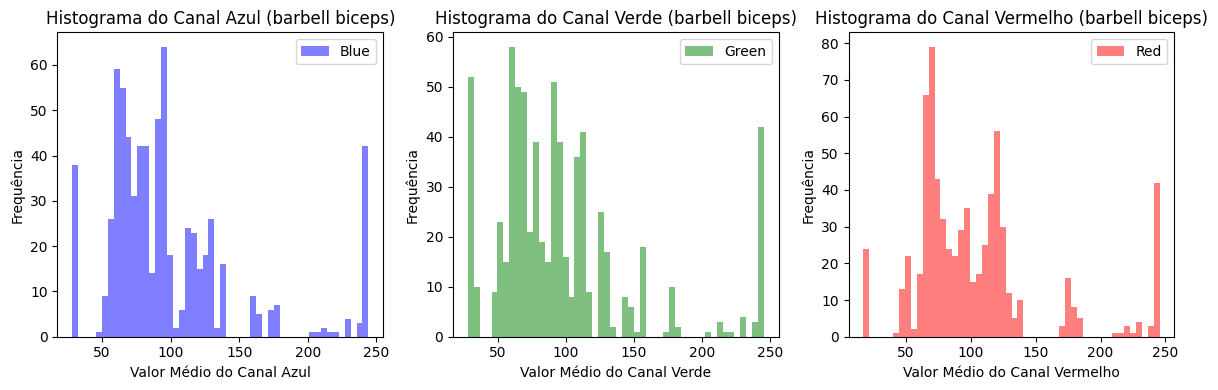

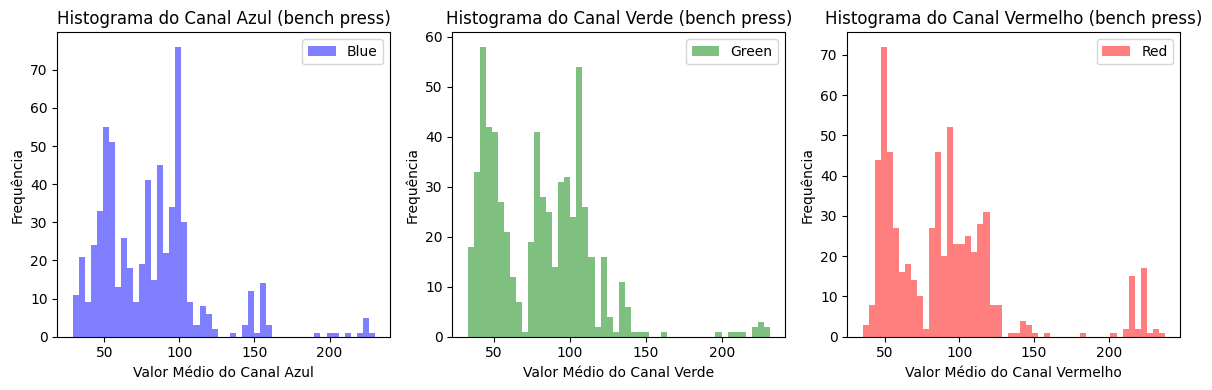

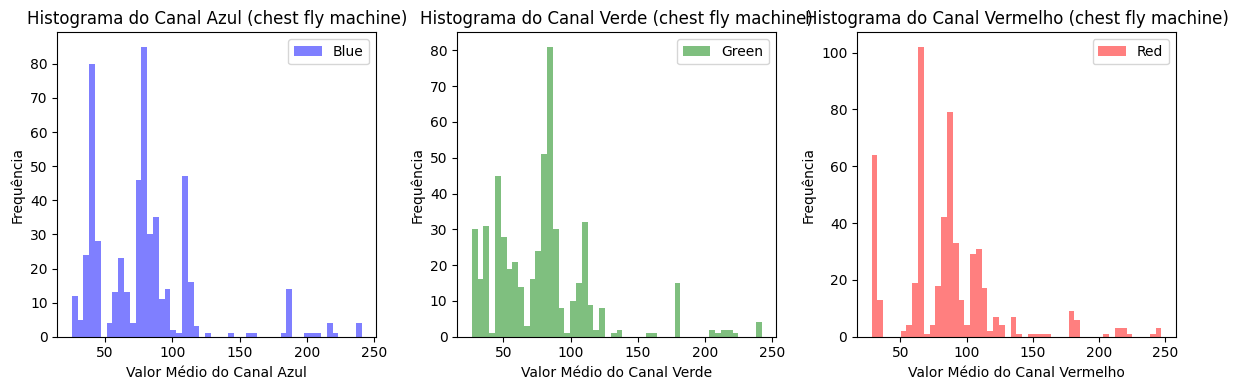

In [16]:
# Diretório de imagens
img_test_barbell_biceps_dir = '/content/data_copy/barbell biceps curl'
img_test_bench_press_dir = '/content/data_copy/bench press'
img_test_chest_fly_machine_dir = '/content/data_copy/chest fly machine'

# Lista para armazenar os tamanhos das imagens
image_sizes_test_barbell_biceps = []
image_sizes_test_bench_press = []
image_sizes_test_chest_fly_machine = []

# Função para criar histogramas
def plot_histogram(directory, title):
    blue_values = []
    green_values = []
    red_values = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            # Carregue a imagem
            image = cv2.imread(os.path.join(directory, filename))

            # Divida a imagem em canais de cores
            blue_channel, green_channel, red_channel = cv2.split(image)

            # Calcule os valores médios dos canais de cores
            blue_values.append(np.mean(blue_channel))
            green_values.append(np.mean(green_channel))
            red_values.append(np.mean(red_channel))

    # Crie um subplot para o histograma
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.hist(blue_values, bins=50, color='blue', alpha=0.5, label='Blue')
    plt.title(f'Histograma do Canal Azul ({title})')
    plt.xlabel('Valor Médio do Canal Azul')
    plt.ylabel('Frequência')
    plt.legend()

    plt.subplot(132)
    plt.hist(green_values, bins=50, color='green', alpha=0.5, label='Green')
    plt.title(f'Histograma do Canal Verde ({title})')
    plt.xlabel('Valor Médio do Canal Verde')
    plt.ylabel('Frequência')
    plt.legend()

    plt.subplot(133)
    plt.hist(red_values, bins=50, color='red', alpha=0.5, label='Red')
    plt.title(f'Histograma do Canal Vermelho ({title})')
    plt.xlabel('Valor Médio do Canal Vermelho')
    plt.ylabel('Frequência')
    plt.legend()

    plt.tight_layout()

# Crie os histogramas para os diretórios de teste
plot_histogram(img_test_barbell_biceps_dir, 'barbell biceps')
plot_histogram(img_test_bench_press_dir, 'bench press')
plot_histogram(img_test_chest_fly_machine_dir, 'chest fly machine')


plt.show()

<ipython-input-17-055c6b3686f7>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(blue_values, shade=True, color='blue', label='Blue', ax=axs[0])
<ipython-input-17-055c6b3686f7>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(green_values, shade=True, color='green', label='Green', ax=axs[1])
<ipython-input-17-055c6b3686f7>:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_values, shade=True, color='red', label='Red', ax=axs[2])
<ipython-input-17-055c6b3686f7>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

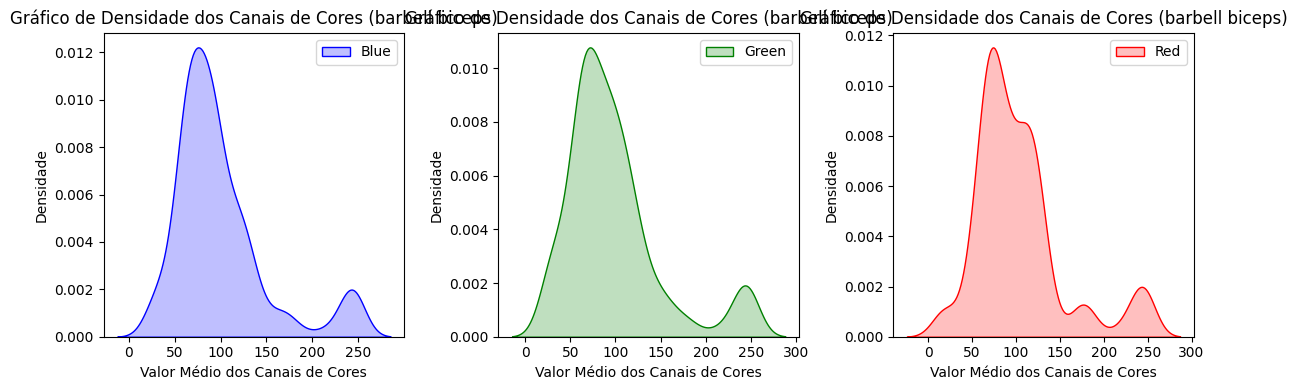

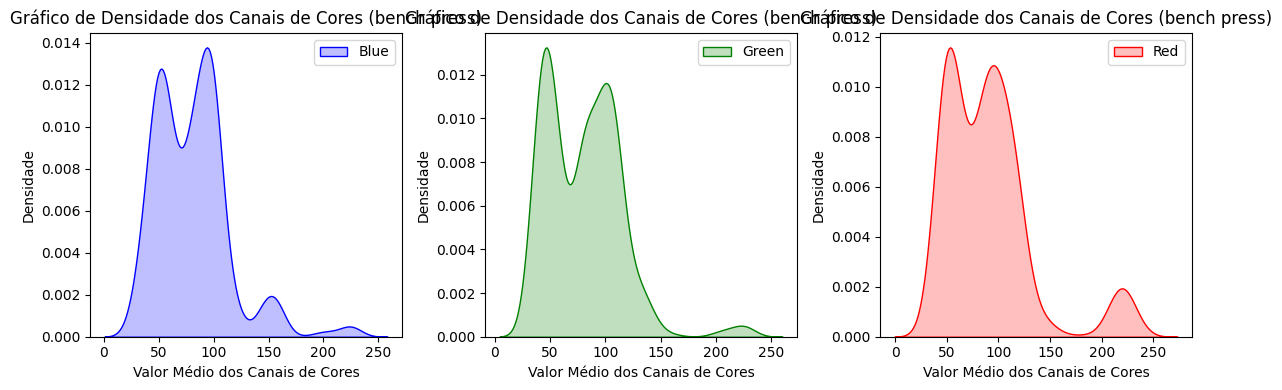

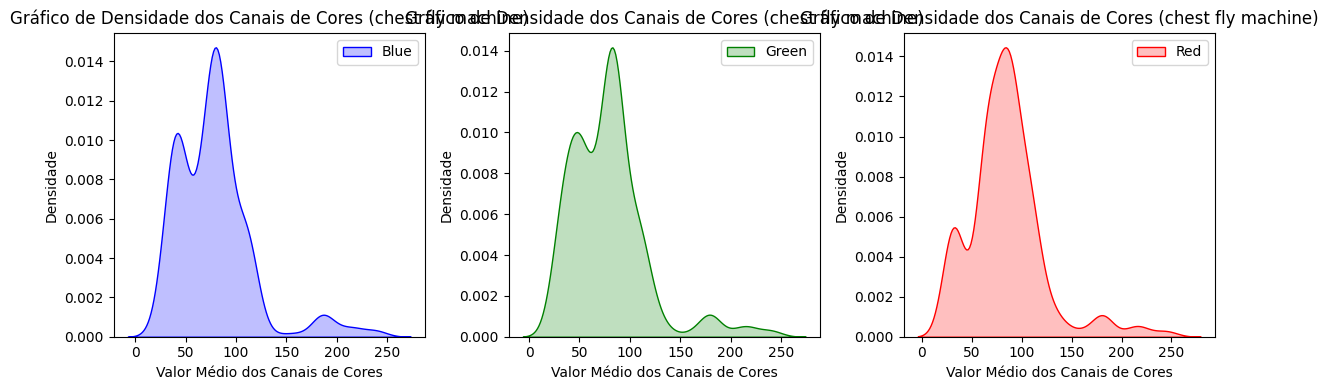

In [17]:
# Diretório de imagens
img_test_barbell_biceps_dir = '/content/data_copy/barbell biceps curl'
img_test_bench_press_dir = '/content/data_copy/bench press'
img_test_chest_fly_machine_dir = '/content/data_copy/chest fly machine'

# Lista para armazenar os tamanhos das imagens
image_sizes_test_barbell_biceps = []
image_sizes_test_bench_press = []
image_sizes_test_chest_fly_machine = []

# Função para criar gráficos de densidade
def plot_density(directory, title):
    blue_values = []
    green_values = []
    red_values = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            # Carregue a imagem
            image = cv2.imread(os.path.join(directory, filename))

            # Divida a imagem em canais de cores
            blue_channel, green_channel, red_channel = cv2.split(image)

            # Calcule os valores médios dos canais de cores
            blue_values.append(np.mean(blue_channel))
            green_values.append(np.mean(green_channel))
            red_values.append(np.mean(red_channel))

    # Crie subplots para os gráficos de densidade
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    sns.kdeplot(blue_values, shade=True, color='blue', label='Blue', ax=axs[0])
    sns.kdeplot(green_values, shade=True, color='green', label='Green', ax=axs[1])
    sns.kdeplot(red_values, shade=True, color='red', label='Red', ax=axs[2])

    for ax in axs:
        ax.set_title(f'Gráfico de Densidade dos Canais de Cores ({title})')
        ax.set_xlabel('Valor Médio dos Canais de Cores')
        ax.set_ylabel('Densidade')
        ax.legend()

    plt.tight_layout()

# Crie os gráficos de densidade para os diretórios de teste
plot_density(img_test_barbell_biceps_dir, 'barbell biceps')
plot_density(img_test_bench_press_dir, 'bench press')
plot_density(img_test_chest_fly_machine_dir, 'chest fly machine')


plt.show()


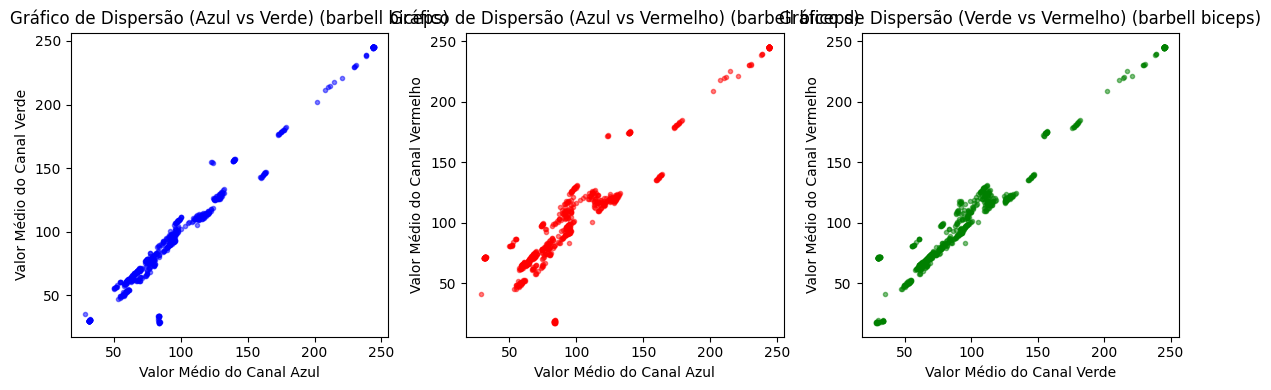

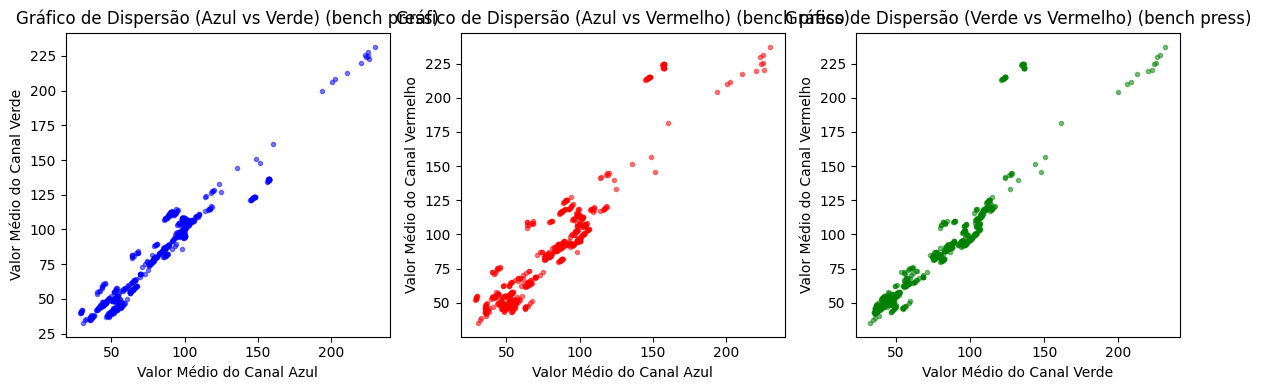

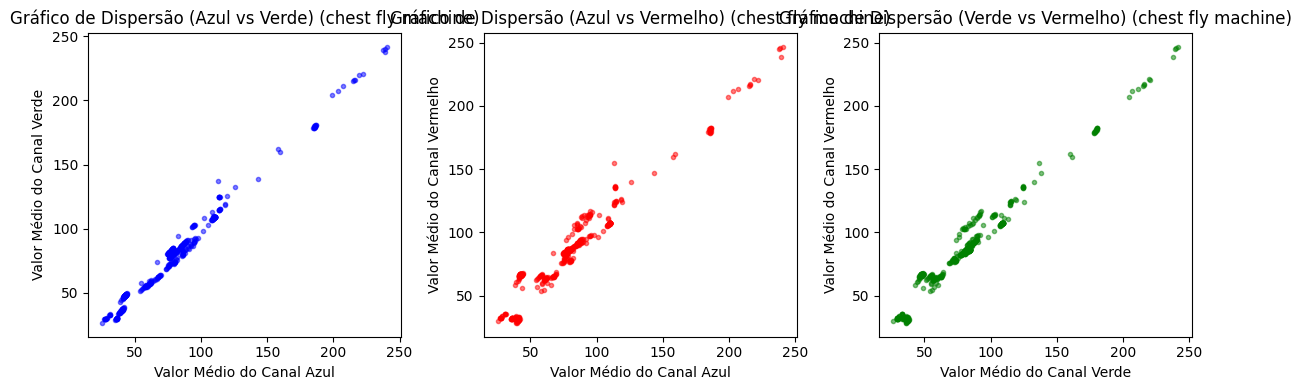

In [18]:
# Diretório de imagens
img_test_barbell_biceps_dir = '/content/data_copy/barbell biceps curl'
img_test_bench_press_dir = '/content/data_copy/bench press'
img_test_chest_fly_machine_dir = '/content/data_copy/chest fly machine'

# Lista para armazenar os tamanhos das imagens
image_sizes_test_barbell_biceps = []
image_sizes_test_bench_press = []
image_sizes_test_chest_fly_machine = []

# Função para criar gráficos de dispersão
def plot_scatter(directory, title):
    blue_values = []
    green_values = []
    red_values = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            # Carregue a imagem
            image = cv2.imread(os.path.join(directory, filename))

            # Divida a imagem em canais de cores
            blue_channel, green_channel, red_channel = cv2.split(image)

            # Calcule os valores médios dos canais de cores
            blue_values.append(np.mean(blue_channel))
            green_values.append(np.mean(green_channel))
            red_values.append(np.mean(red_channel))

    # Crie um subplot para o gráfico de dispersão
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.scatter(blue_values, green_values, c='blue', marker='.', alpha=0.5)
    plt.title(f'Gráfico de Dispersão (Azul vs Verde) ({title})')
    plt.xlabel('Valor Médio do Canal Azul')
    plt.ylabel('Valor Médio do Canal Verde')

    plt.subplot(132)
    plt.scatter(blue_values, red_values, c='red', marker='.', alpha=0.5)
    plt.title(f'Gráfico de Dispersão (Azul vs Vermelho) ({title})')
    plt.xlabel('Valor Médio do Canal Azul')
    plt.ylabel('Valor Médio do Canal Vermelho')

    plt.subplot(133)
    plt.scatter(green_values, red_values, c='green', marker='.', alpha=0.5)
    plt.title(f'Gráfico de Dispersão (Verde vs Vermelho) ({title})')
    plt.xlabel('Valor Médio do Canal Verde')
    plt.ylabel('Valor Médio do Canal Vermelho')

    plt.tight_layout()

# Crie os gráficos de dispersão para os diretórios de teste
plot_scatter(img_test_barbell_biceps_dir, 'barbell biceps')
plot_scatter(img_test_bench_press_dir, 'bench press')
plot_scatter(img_test_chest_fly_machine_dir, 'chest fly machine')

plt.show()


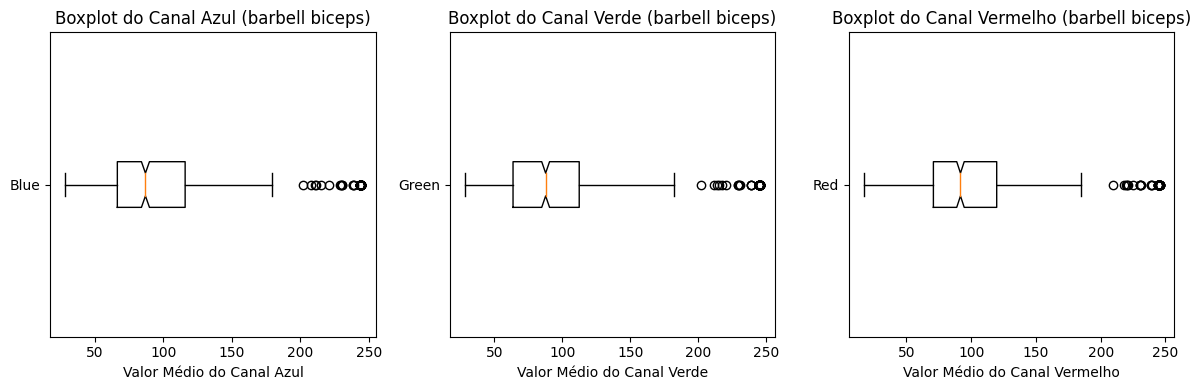

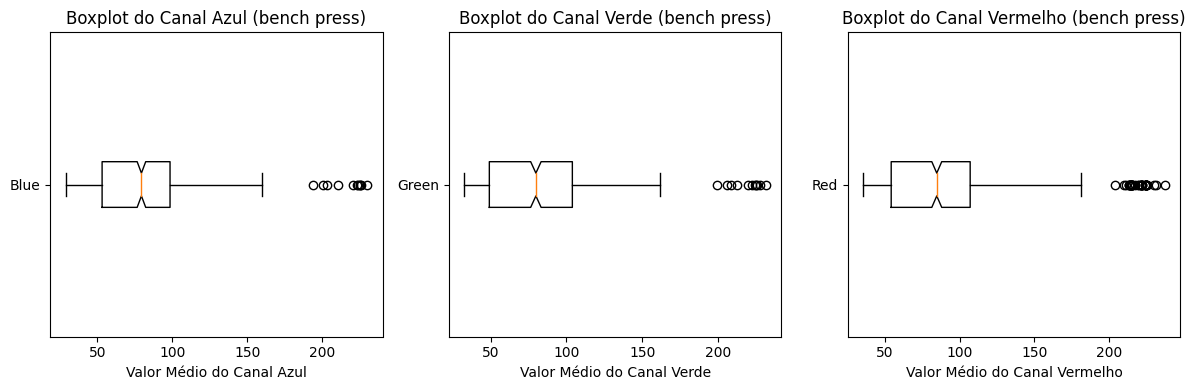

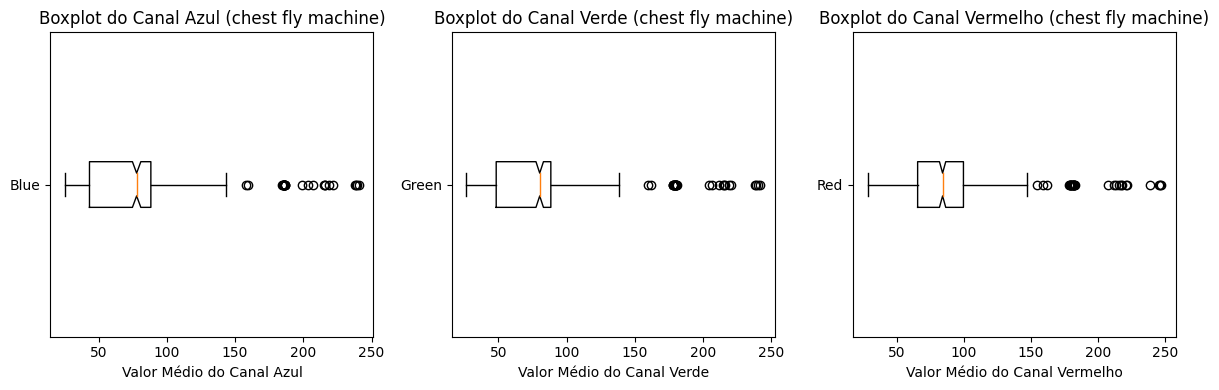

In [19]:
# Diretório de imagens
img_test_barbell_biceps_dir = '/content/data_copy/barbell biceps curl'
img_test_bench_press_dir = '/content/data_copy/bench press'
img_test_chest_fly_machine_dir = '/content/data_copy/chest fly machine'

# Lista para armazenar os tamanhos das imagens
image_sizes_test_barbell_biceps = []
image_sizes_test_bench_press = []
image_sizes_test_chest_fly_machine = []

# Função para criar gráficos de boxplot
def plot_boxplot(directory, title):
    blue_values = []
    green_values = []
    red_values = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            # Carregue a imagem
            image = cv2.imread(os.path.join(directory, filename))

            # Divida a imagem em canais de cores
            blue_channel, green_channel, red_channel = cv2.split(image)

            # Calcule os valores médios dos canais de cores
            blue_values.append(np.mean(blue_channel))
            green_values.append(np.mean(green_channel))
            red_values.append(np.mean(red_channel))

    # Crie um subplot para o gráfico de boxplot
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.boxplot([blue_values], labels=['Blue'], notch=True, vert=False)
    plt.title(f'Boxplot do Canal Azul ({title})')
    plt.xlabel('Valor Médio do Canal Azul')

    plt.subplot(132)
    plt.boxplot([green_values], labels=['Green'], notch=True, vert=False)
    plt.title(f'Boxplot do Canal Verde ({title})')
    plt.xlabel('Valor Médio do Canal Verde')

    plt.subplot(133)
    plt.boxplot([red_values], labels=['Red'], notch=True, vert=False)
    plt.title(f'Boxplot do Canal Vermelho ({title})')
    plt.xlabel('Valor Médio do Canal Vermelho')

    plt.tight_layout()

# Crie os gráficos de boxplot para os diretórios de teste
plot_boxplot(img_test_barbell_biceps_dir, 'barbell biceps')
plot_boxplot(img_test_bench_press_dir, 'bench press')
plot_boxplot(img_test_chest_fly_machine_dir, 'chest fly machine')

plt.show()


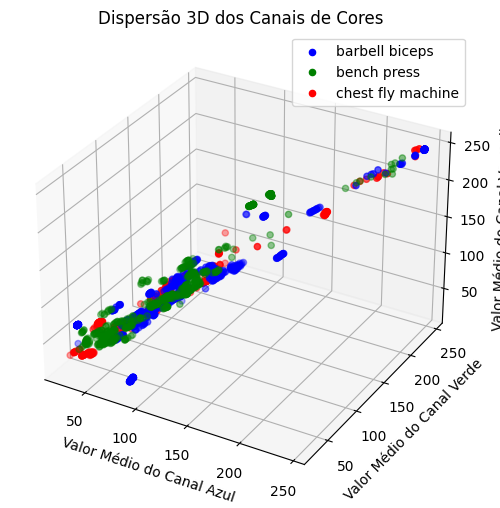

In [20]:
# Diretórios de imagens
img_test_barbell_biceps_dir = '/content/data_copy/barbell biceps curl'
img_test_bench_press_dir = '/content/data_copy/bench press'
img_test_chest_fly_machine_dir = '/content/data_copy/chest fly machine'
# Função para criar gráfico de dispersão 3D com cores diferentes para cada classe
def plot_scatter3D(ax, directory, title, color):
    blue_values = []
    green_values = []
    red_values = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            # Carregue a imagem
            image = cv2.imread(os.path.join(directory, filename))
            # Divida a imagem em canais de cores
            blue_channel, green_channel, red_channel = cv2.split(image)
            # Calcule os valores médios dos canais de cores
            blue_values.append(np.mean(blue_channel))
            green_values.append(np.mean(green_channel))
            red_values.append(np.mean(red_channel))
    # Crie um gráfico de dispersão 3D
    ax.scatter(blue_values, green_values, red_values, c=color, marker='o', label=title)
# Crie um único gráfico de dispersão 3D para todas as classes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plot_scatter3D(ax, img_test_barbell_biceps_dir, 'barbell biceps', 'blue')
plot_scatter3D(ax, img_test_bench_press_dir, 'bench press', 'green')
plot_scatter3D(ax, img_test_chest_fly_machine_dir, 'chest fly machine', 'red')
ax.set_xlabel('Valor Médio do Canal Azul')
ax.set_ylabel('Valor Médio do Canal Verde')
ax.set_zlabel('Valor Médio do Canal Vermelho')
ax.set_title('Dispersão 3D dos Canais de Cores')
ax.legend()
plt.show()


In [21]:
# Diretórios de imagens
img_test_barbell_biceps_dir = '/content/data_copy/barbell biceps curl'
img_test_bench_press_dir = '/content/data_copy/bench press'
img_test_chest_fly_machine_dir = '/content/data_copy/chest fly machine'
# Função para converter coordenadas cartesianas em coordenadas polares
def cart2pol(x, y, z):
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    rho = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y, x)
    theta = np.arccos(z / rho)
    return rho, phi, theta
# Função para criar gráfico de dispersão 3D em coordenadas polares
def plot_scatter3D_polar(fig, directory, title, color):
    blue_values = []
    green_values = []
    red_values = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            image = cv2.imread(os.path.join(directory, filename))
            blue_channel, green_channel, red_channel = cv2.split(image)
            blue_values.append(np.mean(blue_channel))
            green_values.append(np.mean(green_channel))
            red_values.append(np.mean(red_channel))
    rho, phi, theta = cart2pol(blue_values, green_values, red_values)
    scatter = go.Scatter3d(
        x=phi,
        y=theta,
        z=rho,
        mode='markers',
        marker=dict(color=color, size=5),
        name=title)
    fig.add_trace(scatter)
fig = go.Figure()
plot_scatter3D_polar(fig, img_test_barbell_biceps_dir, 'barbell biceps', 'blue')
plot_scatter3D_polar(fig, img_test_bench_press_dir, 'bench press', 'green')
plot_scatter3D_polar(fig, img_test_chest_fly_machine_dir, 'chest fly machine', 'red')
fig.update_layout(
    scene=dict(xaxis_title='Ângulo Phi', yaxis_title='Ângulo Theta',
        zaxis_title='Rho (Distância ao Centro)'),
    scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=0, y=2, z=0)))
fig.show()


In [22]:
import os
import cv2
import numpy as np
import plotly.graph_objects as go

# Diretórios de imagens
img_test_barbell_biceps_dir = '/content/data_copy/barbell biceps curl'
img_test_bench_press_dir = '/content/data_copy/bench press'
img_test_chest_fly_machine_dir = '/content/data_copy/chest fly machine'

# Função para criar gráfico de dispersão 3D em coordenadas polares
def plot_scatter3D_polar(fig, directory, title, color):
    gray_values = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            # Carregue a imagem em escala de cinza
            image = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)

            # Calcule o valor médio do canal em escala de cinza
            gray_values.append(np.mean(image))

    # Converta as coordenadas cartesianas em coordenadas polares
    rho, phi, theta = cart2pol(gray_values)

    # Crie um gráfico de dispersão 3D em coordenadas polares
    scatter = go.Scatter3d(
        x=phi,
        y=theta,
        z=rho,
        mode='markers',
        marker=dict(color=color, size=5),
        name=title
    )

    fig.add_trace(scatter)

# Função para converter coordenadas cartesianas em coordenadas polares
def cart2pol(values):
    values = np.array(values)

    rho = values
    phi = np.linspace(0, 2 * np.pi, len(values))
    theta = np.ones_like(values)

    return rho, phi, theta

# Crie um único gráfico de dispersão 3D em coordenadas polares para todas as classes
fig = go.Figure()

plot_scatter3D_polar(fig, img_test_barbell_biceps_dir, 'barbell biceps', 'blue')
plot_scatter3D_polar(fig, img_test_bench_press_dir, 'bench press', 'green')
plot_scatter3D_polar(fig, img_test_chest_fly_machine_dir, 'chest fly machine', 'red')

fig.update_layout(
    scene=dict(
        xaxis_title='Ângulo Phi',
        yaxis_title='Ângulo Theta',
        zaxis_title='Rho (Distância ao Centro)'
    ),
    scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=0, y=2, z=0))
)

# Exiba o gráfico interativo
fig.show()


#PRÉ-PROCESSAMENTO DE DADOS

In [23]:
def aplicar_transformacoes(diretorio):
    for filename in os.listdir(diretorio):
        # Caminho completo do arquivo
        arquivo = os.path.join(diretorio, filename)

        # Verifica se é um arquivo de imagem
        if arquivo.endswith(('.jpg', '.png', '.jpeg')):
            # Lê a imagem usando OpenCV
            imagem = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE)

            # Aumenta o brilho
            aumentar_brilho = ImageEnhance.Brightness(Image.fromarray(imagem))
            imagem_brilhante = aumentar_brilho.enhance(1.5)  # 1.5 é um exemplo, ajuste conforme necessário

            # Salva a imagem de volta no mesmo arquivo
            cv2.imwrite(arquivo, np.array(imagem_brilhante))

In [24]:
diretorio1 = "/content/data_copy/train/barbell biceps curl"
aplicar_transformacoes(diretorio1)

diretorio2 = "/content/data_copy/train/bench press"
aplicar_transformacoes(diretorio2)

diretorio3 = "/content/data_copy/train/chest fly machine"
aplicar_transformacoes(diretorio3)

diretorio4 = "/content/data_copy/train/deadlift"
aplicar_transformacoes(diretorio4)

diretorio5 = "/content/data_copy/train/decline bench press"
aplicar_transformacoes(diretorio5)

diretorio6 = "/content/data_copy/train/hammer curl"
aplicar_transformacoes(diretorio6)

diretorio7 = "/content/data_copy/train/hip thrust"
aplicar_transformacoes(diretorio7)

diretorio8 = "/content/data_copy/train/incline bench press"
aplicar_transformacoes(diretorio8)

diretorio9 = "/content/data_copy/train/lat pulldown"
aplicar_transformacoes(diretorio9)

diretorio10 = "/content/data_copy/train/lateral raises"
aplicar_transformacoes(diretorio10)

diretorio11 = "/content/data_copy/train/leg extension"
aplicar_transformacoes(diretorio11)

diretorio12 = "/content/data_copy/train/leg raises"
aplicar_transformacoes(diretorio12)

diretorio13 = "/content/data_copy/train/plank"
aplicar_transformacoes(diretorio13)

diretorio14 = "/content/data_copy/train/pull up"
aplicar_transformacoes(diretorio14)

diretorio15 = "/content/data_copy/train/push up"
aplicar_transformacoes(diretorio15)

diretorio16 = "/content/data_copy/train/romanian deadlift"
aplicar_transformacoes(diretorio16)

diretorio17 = "/content/data_copy/train/russian twist"
aplicar_transformacoes(diretorio17)

diretorio18 = "/content/data_copy/train/shoulder press"
aplicar_transformacoes(diretorio18)

diretorio19 = "/content/data_copy/train/squat"
aplicar_transformacoes(diretorio19)

diretorio20 = "/content/data_copy/train/t bar row"
aplicar_transformacoes(diretorio20)

diretorio21 = "/content/data_copy/train/tricep dips"
aplicar_transformacoes(diretorio21)

diretorio22 = "/content/data_copy/train/tricep pushdown"
aplicar_transformacoes(diretorio22)

#TRANSFER LEARNING - MOBILENETV2

In [25]:
conv_base = MobileNetV2(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))


9406464/9406464 [==============================] - 2s 0us/step


In [26]:
base_dir = '/content/data_copy'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 1280))
    labels = np.zeros(shape=(sample_count, 22))  # 22 classes
    generator = datagen.flow_from_directory(
        directory,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [27]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

#FLATTEN MANUAL

In [28]:
train_features, train_labels = extract_features(train_dir, 11074)
validation_features, validation_labels = extract_features(validation_dir, 2779)

train_features = np.reshape(train_features, (11074, 7 * 7 * 1280))
validation_features = np.reshape(validation_features, (2779, 7 * 7 * 1280))

Found 11074 images belonging to 22 classes.
1/1 [==============================] - 0s 479ms/step
Found 2779 images belonging to 22 classes.
1/1 [==============================] - 1s 503ms/step


#MODELO DE CLASSIFICAÇÃO

In [29]:
model2 = models.Sequential()
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(256, activation='relu', input_shape=(7 * 7 * 1280,), kernel_initializer=he_normal()))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(128, activation='relu', kernel_initializer=he_normal()))
model2.add(layers.Dense(22, activation='softmax', kernel_initializer=he_normal()))  # 22 classes

#COMPILAÇÃO DO MODELO

In [30]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])

#TREINAMENTO DO MODELO

USADO APENAS PARA MOSTRAR AS CLASSES

In [38]:
#USADO APENAS PARA MOSTRAR AS CLASSES E VALORES, NÃO FOI USADO NO MODELO
train_datagen = ImageDataGenerator(
      rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir)
train_generator.class_indices

Found 11074 images belonging to 22 classes.


{'barbell biceps curl': 0,
 'bench press': 1,
 'chest fly machine': 2,
 'deadlift': 3,
 'decline bench press': 4,
 'hammer curl': 5,
 'hip thrust': 6,
 'incline bench press': 7,
 'lat pulldown': 8,
 'lateral raises': 9,
 'leg extension': 10,
 'leg raises': 11,
 'plank': 12,
 'pull up': 13,
 'push up': 14,
 'romanian deadlift': 15,
 'russian twist': 16,
 'shoulder press': 17,
 'squat': 18,
 't bar row': 19,
 'tricep dips': 20,
 'tricep pushdown': 21}

In [ ]:
# Defina o EarlyStopping com base na métrica 'val_accuracy'
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, min_delta=0.01)

history = model2.fit(
    train_features,
    train_labels,
    epochs=200,
    batch_size=20,
    validation_data=(validation_features, validation_labels),
    callbacks=[early_stopping_callback]
)

In [ ]:
#Salvar Modelo Completo
model2.save("data/modelo_completo_Tranf_Learning_MobileNetV2_9381_.h5")

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

#PREVISÃO DE IMAGENS

In [33]:
diretorio_das_imagens = '/content/data_copy/test/barbell biceps curl'

#criando diretório
resultados = {}

#Loop através das imagens no diretório
for filename in os.listdir(diretorio_das_imagens):
  if filename.endswith(".jpg"):

    #carregue a imagem que você deseja prever
    img_path = os.path.join(diretorio_das_imagens, filename)
    img = image.load_img(img_path, target_size=(250,250))
    img_array = image.img_to_array(img)
    img_array = (img_array*(1./255))
    img_array = np.expand_dims(img_array, axis=0)

    #Faça a Previsão
    predictions = model.predict(img_array)

    #Interprete os resultados
    predicted_class = np.argmax(predictions)
    #print(f'Imagem: {filename}, Classe prevista: {predicted_class}')
    resultados[filename]=predicted_class

df_resultados = pd.DataFrame(list(resultados.items()), columns=['Nome da Imagem', 'Classe Prevista'])
print(df_resultados)

caminho_arquivo_excel = '/content/barbell biceps curl.xlsx'

df_resultados.to_excel(caminho_arquivo_excel, index=False)
print(f'DataFrame exportado para {caminho_arquivo_excel}')

1/1 [==============================] - 0s 18ms/step
                      Nome da Imagem  Classe Prevista
0    barbell biceps curl_5800151.jpg                0
1    barbell biceps curl_6200001.jpg                0
2    barbell biceps curl_5600101.jpg                0
3    barbell biceps curl_5700141.jpg                0
4    barbell biceps curl_2800011.jpg                0
..                               ...              ...
136  barbell biceps curl_1100061.jpg                0
137  barbell biceps curl_1000081.jpg                0
138  barbell biceps curl_2300011.jpg                0
139  barbell biceps curl_4600001.jpg                0
140  barbell biceps curl_4400171.jpg                0

[141 rows x 2 columns]
DataFrame exportado para /content/barbell biceps curl.xlsx


In [39]:
total_items_0 = (df_resultados['Classe Prevista'] != 0).sum()
total_items_classe_0 = (df_resultados['Classe Prevista'] == 0).sum()
acuracia_0 = (total_items_classe_0/(total_items_0+total_items_classe_0))
print(f'Classe barbell biceps curl obteve: {acuracia_0}')

Classe barbell biceps curl obteve: 0.9787234042553191


In [40]:
#diretório de imagens
diretorio_das_imagens = '/content/data_copy/test/bench press'

#criando diretório
resultados = {}

#Loop através das imagens no diretório
for filename in os.listdir(diretorio_das_imagens):
  if filename.endswith(".jpg"):

    #carregue a imagem que você deseja prever
    img_path = os.path.join(diretorio_das_imagens, filename)
    img = image.load_img(img_path, target_size=(250,250))
    img_array = image.img_to_array(img)
    img_array = (img_array*(1./255))
    img_array = np.expand_dims(img_array, axis=0)

    #Faça a Previsão
    predictions = model.predict(img_array)

    #Interprete os resultados
    predicted_class = np.argmax(predictions)
    #print(f'Imagem: {filename}, Classe prevista: {predicted_class}')
    resultados[filename]=predicted_class

df_resultados1 = pd.DataFrame(list(resultados.items()), columns=['Nome da Imagem', 'Classe Prevista'])
print(df_resultados1)

caminho_arquivo_excel = '/content/bench press.xlsx'

df_resultados.to_excel(caminho_arquivo_excel, index=False)
print(f'DataFrame exportado para {caminho_arquivo_excel}')

1/1 [==============================] - 0s 19ms/step
              Nome da Imagem  Classe Prevista
0    bench press_4700021.jpg                1
1     bench press_300021.jpg                1
2    bench press_1100021.jpg                1
3    bench press_1100031.jpg                1
4    bench press_2900121.jpg                1
..                       ...              ...
120  bench press_1400011.jpg                1
121  bench press_3500041.jpg                1
122  bench press_1500011.jpg                1
123  bench press_2900181.jpg                1
124  bench press_4500031.jpg                1

[125 rows x 2 columns]
DataFrame exportado para /content/bench press.xlsx


In [41]:
total_items_1 = (df_resultados1['Classe Prevista'] != 1).sum()
total_items_classe_1 = (df_resultados1['Classe Prevista'] == 1).sum()
acuracia_1 = (total_items_classe_1/(total_items_1+total_items_classe_1))
print(f'Classe Bench Press obteve: {acuracia_1}')

Classe Bench Press obteve: 0.952


#CARREGAR MODELO SALVO

In [80]:
from tensorflow.keras.models import load_model
#Carregar modelo completo (arquitetura e pesos)
loaded_model = load_model("/content/drive/MyDrive/ENTREGA TCC - EXERCÍCIOS EM ACADEMIA/modelo_completo_Tranf_Learning_MobileNetV2_9381_.h5")
model = loaded_model
model2 = loaded_model

#PREVISÃO DE VIDEOS

##CARREGAR BASE DE DADOS

In [43]:
# Defina o caminho para a pasta do dataset no Google Drive
local_zip = '/content/drive/MyDrive/ENTREGA TCC - CLASSIFICAÇÃO DE EXERCICIOS NA ACADEMIA/videos_exercicios.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data_videos/')
zip_ref.close()

In [56]:
#Verificar as Categorias dentro das Pastas e a Quantidade de Imagens
categorias = ['barbell biceps curl', 'bench press', 'chest fly machine', 'deadlift', 'decline bench press',
            'hammer curl', 'hip thrust', 'incline bench press', 'lat pulldown', 'lateral raise',
            'leg extension', 'leg raises', 'plank', 'pull Up', 'push-up', 'romanian deadlift', 'russian twist',
            'shoulder press', 'squat', 't bar row', 'tricep dips', 'tricep Pushdown']

In [81]:
def predict_video_class(video_path, model, conv_base):
    cap = cv2.VideoCapture(video_path)
    # Verifique se o arquivo de vídeo foi aberto com sucesso
    if not cap.isOpened():
        print("Erro ao abrir o arquivo de vídeo.")
        return None
    # Lista para armazenar as classes previstas para cada quadro
    predicted_classes = []
    while True:
        # Leia o próximo quadro do vídeo
        ret, frame = cap.read()
        # Verifique se o vídeo chegou ao final
        if not ret:
            break
        # Redimensione o quadro para o tamanho de entrada esperado pelo modelo
        img = cv2.resize(frame, (224, 224))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = img / 255.0  # Normaliza a imagem
        # Extraia recursos da imagem usando a VGG16 pré-treinada
        features = conv_base.predict(img)
        predict_features = np.reshape(features, (1, 7 * 7 * 1280))
        # Faça a previsão usando o modelo
        prediction = model.predict(predict_features)
        predicted_class = np.argmax(prediction)
        # Mapeie o índice da classe para a classe real (se necessário)
        class_names = categoria
        predicted_class_name = class_names[predicted_class]
        # Adicione a classe prevista à lista
        predicted_classes.append(predicted_class_name)
    # Libere os recursos do arquivo de vídeo
    cap.release()
    return predicted_classes


In [82]:
video='/content/data_videos/plank/plank_4.mp4'
predict_video_class(video, model, conv_base)

1/1 [==============================] - 0s 19ms/step


['plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
 'plank',
